In [49]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [50]:
# ===== Colab / Environment Setup =====
!pip install -q tensorflow-datasets


In [51]:
import tensorflow_datasets as tfds

In [52]:
(ds_train, ds_test), ds_info = tfds.load(
    'emnist/balanced',
    split=['train', 'test'],
    as_supervised=True,
    with_info=True
)


In [53]:
images = []
labels = []

for img, lbl in tfds.as_numpy(ds_train):
    images.append(img)
    labels.append(lbl)

x_train = np.array(images)
y_train = np.array(labels)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

x_train shape: (112800, 28, 28, 1)
y_train shape: (112800,)


In [54]:
test_images = []
test_labels = []

for img, lbl in tfds.as_numpy(ds_test):
    test_images.append(img)
    test_labels.append(lbl)

x_test = np.array(test_images)
y_test = np.array(test_labels)

print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_test shape: (18800, 28, 28, 1)
y_test shape: (18800,)


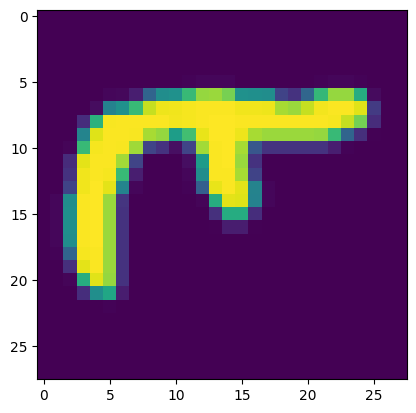

In [55]:
import matplotlib .pyplot as plt
plt.imshow(x_train[4])

In [56]:
def fix_emnist_orientation(images):
    single_image = False

    if images.ndim == 2:  # (28, 28)
        images = images[np.newaxis, ...]
        single_image = True

    if images.ndim == 4:
        images = images.squeeze(-1)

    images = np.transpose(images, (0, 2, 1))
    images = np.flip(images, axis=1)
    images = images[..., np.newaxis]

    if single_image:
        images = images[0]

    return images


In [57]:
x_train = fix_emnist_orientation(x_train)
x_test  = fix_emnist_orientation(x_test)


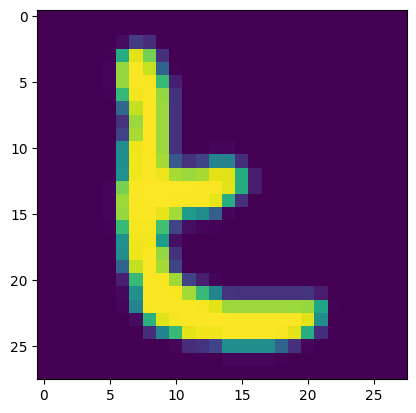

In [58]:
import matplotlib .pyplot as plt
plt.imshow(x_train[4])

In [59]:
X_train_final , x_cv , y_train_final , y_cv= train_test_split(
    x_train,
    y_train,
    test_size=0.2,
    random_state=1,
    stratify=y_train
)

In [60]:
print(X_train_final.shape)
print(x_cv.shape)
print(y_train_final.shape)
print(y_cv.shape)
print(x_test.shape)
print(y_test.shape)

(90240, 28, 28, 1)
(22560, 28, 28, 1)
(90240,)
(22560,)
(18800, 28, 28, 1)
(18800,)


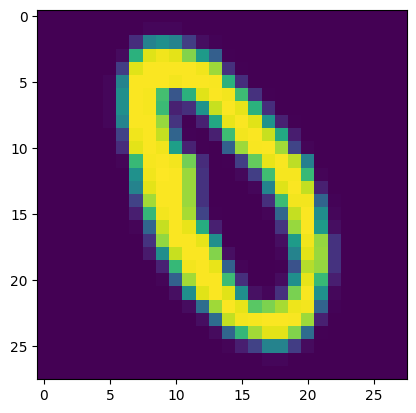

In [61]:
plt.imshow(X_train_final[2])



In [62]:
X_train_final = X_train_final.astype('float32') / 255.0
x_cv          = x_cv.astype('float32') / 255.0
x_test       = x_test.astype('float32') / 255.0


In [63]:
print(X_train_final.dtype)
print(X_train_final.min(), X_train_final.max())


float32
0.0 1.0


In [64]:
X_train_flat = X_train_final.reshape(X_train_final.shape[0], -1)
x_cv_flat = x_cv.reshape(x_cv.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

In [65]:
print(X_train_flat.shape)
print(x_cv_flat.shape)
print(x_test_flat.shape)


(90240, 784)
(22560, 784)
(18800, 784)


In [66]:
print(y_train_final.shape)
print(y_cv.shape)
print(y_test.shape)

(90240,)
(22560,)
(18800,)


In [67]:
np.unique(y_train_final)


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46])

In [68]:
tf.random.set_seed(1234)
model = Sequential([
        tf.keras.Input(shape=(784,)),

        Dense(256,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.0008)),
        Dense(128,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.0008)),
        Dense(47,activation='linear'),

    ])


In [69]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 47)             │         6,063 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 239,919 (937.18 KB)

 Trainable params: 239,919 (937.18 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
[layer1, layer2, layer3] = model.layers

In [71]:

W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()

print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")


W1 shape = (784, 256), b1 shape = (256,)
W2 shape = (256, 128), b2 shape = (128,)
W3 shape = (128, 47), b3 shape = (47,)


In [72]:
print(model.layers[2].weights)

[<Variable path=sequential_1/dense_5/kernel, shape=(128, 47), dtype=float32, value=[[-0.15548572 -0.11262065 -0.09414329 ...  0.12609483  0.03507337
  -0.10746619]
 [-0.00731455 -0.16702147  0.05701707 ... -0.07077402 -0.0290323
  -0.08394805]
 [-0.12626953  0.08449547 -0.07485585 ... -0.09493104  0.14312471
  -0.06993315]
 ...
 [ 0.11229749 -0.02391997  0.02150364 ... -0.14274351  0.0302003
   0.00099595]
 [-0.00524227 -0.14646888  0.12105109 ... -0.01824506  0.18125768
   0.01079026]
 [-0.09580912  0.15771069  0.0572582  ... -0.14546832 -0.10566364
  -0.13783354]]>, <Variable path=sequential_1/dense_5/bias, shape=(47,), dtype=float32, value=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]>]


In [73]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.001),
     metrics=['accuracy']

)


In [74]:
history = model.fit(
    X_train_flat, y_train_final,
    epochs=20,
    batch_size=128,
    validation_data=(x_cv_flat, y_cv),
    verbose=1
)


Epoch 1/20
705/705 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.5493 - loss: 2.0273 - val_accuracy: 0.7575 - val_loss: 1.0979
Epoch 2/20
705/705 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7739 - loss: 1.0306 - val_accuracy: 0.7924 - val_loss: 0.9370
Epoch 3/20
705/705 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.8021 - loss: 0.8862 - val_accuracy: 0.8082 - val_loss: 0.8568
Epoch 4/20
705/705 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8164 - loss: 0.8148 - val_accuracy: 0.8157 - val_loss: 0.8146
Epoch 5/20
705/705 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.8252 - loss: 0.7698 - val_accuracy: 0.8189 - val_loss: 0.7893
Epoch 6/20
705/705 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8311 - loss: 0.7385 - val_accuracy: 0.8224 - val_loss: 0.7683
Epoch 7/20
705/705 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8346 - loss: 0.7151 - val_accuracy: 0.8261 - val_loss: 0.7515
Epoch 8/20
705/705 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8391 - loss: 0.6962 - val_acc

In [75]:
train_loss, train_acc = model.evaluate(X_train_flat, y_train_final, verbose=0)
cv_loss, cv_acc = model.evaluate(x_cv_flat, y_cv, verbose=0)

print(f"Train error (loss): {train_loss:.4f}")
print(f"CV error (loss):    {cv_loss:.4f}")


Train error (loss): 0.5820
CV error (loss):    0.6717


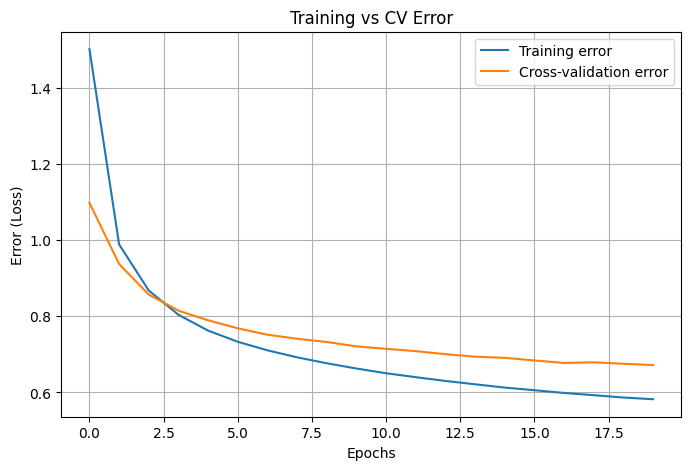

In [76]:
train_errors = history.history['loss']
cv_errors    = history.history['val_loss']

plt.figure(figsize=(8,5))
plt.plot(train_errors, label='Training error')
plt.plot(cv_errors, label='Cross-validation error')

plt.xlabel('Epochs')
plt.ylabel('Error (Loss)')
plt.title('Training vs CV Error')
plt.legend()
plt.grid(True)
plt.show()

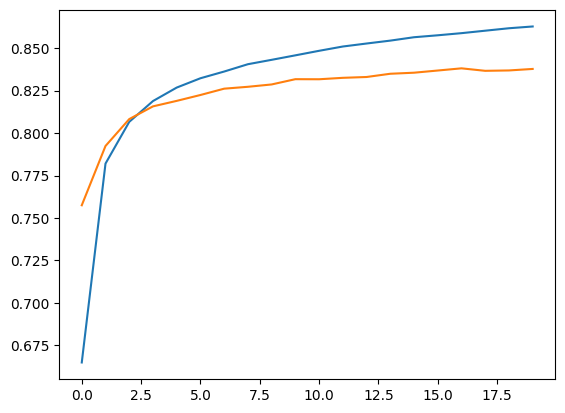

In [77]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [78]:
logits_train = model.predict(X_train_flat)
logits_cv    = model.predict(x_cv_flat)


2820/2820 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
705/705 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [79]:
print(logits_train )


[[-5.1016412e+00 -3.7401371e+00 -1.0827069e+01 ... -6.0977321e+00
   4.0292248e-01 -1.3385368e+01]
 [-4.5005131e+00 -6.3040596e-01 -1.6884328e+00 ... -1.8701626e+00
  -7.7336564e+00 -6.5385671e+00]
 [ 1.7922659e+00 -5.6241660e+00 -6.3431282e+00 ... -4.4021206e+00
  -5.7313862e+00 -1.4367020e+01]
 ...
 [-6.6489682e+00 -1.2965676e+01 -5.1565766e-03 ...  2.3817670e+00
  -1.4351647e+01 -8.2697420e+00]
 [-7.4091544e+00 -8.0272684e+00 -7.7555556e+00 ... -5.7476096e+00
  -1.6636091e+00 -1.1844683e+01]
 [-6.8736591e+00  2.3041728e+00 -5.5663371e+00 ... -2.5899341e+00
  -6.0400538e+00 -1.0026442e+00]]


In [80]:
print(logits_cv)

[[ -1.8533773  -6.5603995  -2.585998  ...  -4.3850403  -7.7799883
  -16.193413 ]
 [ -3.114724   -5.6494317  -6.140537  ...   1.292039   -5.1872587
  -10.216912 ]
 [  4.855681   -5.8775716  -7.5479074 ...  -5.2177353  -4.817729
   -8.365842 ]
 ...
 [ -9.624418  -12.38243    -1.6170768 ...   6.0809073 -10.604381
   -9.845225 ]
 [ -6.5096273 -11.070132    1.8852406 ...  -3.8179648  -9.199456
   -8.3026085]
 [ -8.041154   -3.2761946  -8.986851  ...  -2.3244042  -1.002504
    3.161192 ]]


In [81]:
y_train_pred = np.argmax(logits_train, axis=1)
y_cv_pred    = np.argmax(logits_cv, axis=1)


In [82]:
print(y_train_pred)
print(y_cv_pred)

[23  7  0 ... 41 10 21]
[36 26  0 ... 44  2 46]


In [84]:
train_accuracy = np.mean(y_train_pred == y_train_final)
cv_accuracy    = np.mean(y_cv_pred == y_cv)


In [85]:
train_accuracy = np.sum(y_train_pred == y_train_final) / len(y_train_final)
cv_accuracy    = np.sum(y_cv_pred == y_cv) / len(y_cv)


In [86]:
print("Manual Train Accuracy:", train_accuracy)
print("Manual CV Accuracy:", cv_accuracy)


Manual Train Accuracy: 0.8608156028368794
Manual CV Accuracy: 0.8377216312056738


In [ ]:
# tf.random.set_seed(1234)
# lambdas = [0.0, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3]
# models=[None] * len(lambdas)

# for i in range(len(lambdas)):
#     lambda_ = lambdas[i]
#     models[i] =  Sequential(
#         [
#             Dense(120, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
#             Dense(40, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
#             Dense(classes, activation = 'linear')
#         ]
#     )
#     models[i].compile(
#         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#         optimizer=tf.keras.optimizers.Adam(0.01),
#     )

#     models[i].fit(
#         X_train,y_train,
#         epochs=1000
#     )
#     print(f"Finished lambda = {lambda_}")


In [87]:
test_loss, test_acc = model.evaluate(x_test_flat, y_test, verbose=0)

print("Keras test accuracy:", test_acc)



Keras test accuracy: 0.8313829898834229


In [88]:
y_test_probs = model.predict(x_test_flat)


588/588 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [89]:
y_test_pred = np.argmax(y_test_probs, axis=1)

In [90]:
misclassified = np.sum(y_test_pred != y_test)
total = y_test.shape[0]

print(f"Misclassified samples: {misclassified}/{total}")


Misclassified samples: 3170/18800


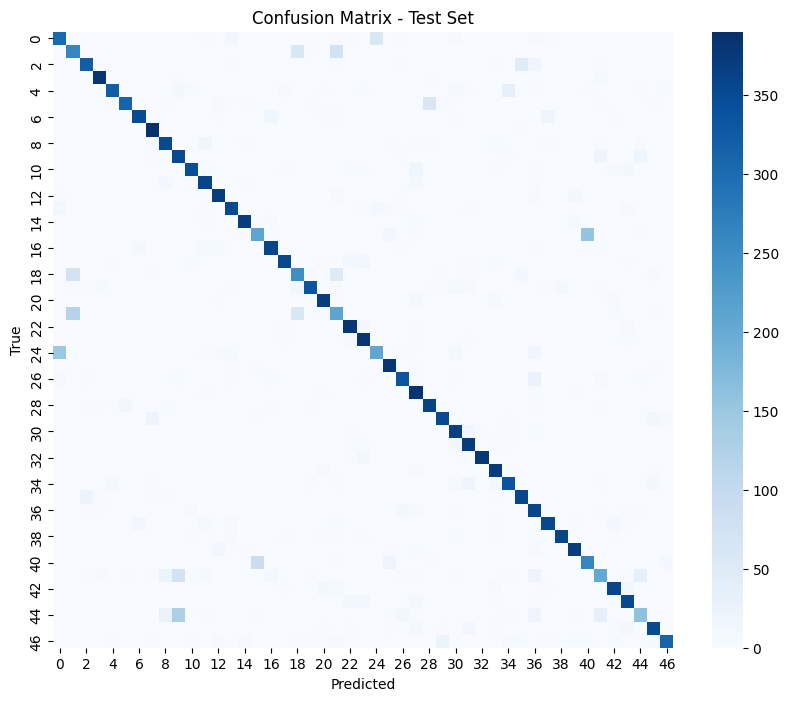

In [91]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Test Set")
plt.show()


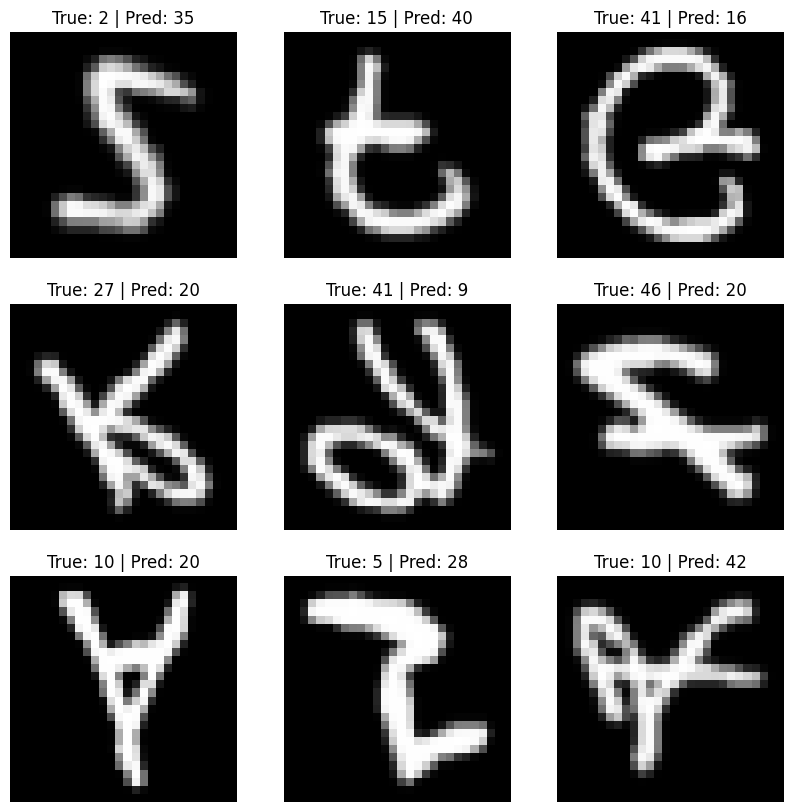

In [92]:
wrong_idx = np.where(y_test_pred != y_test)[0]

plt.figure(figsize=(10, 10))
for i, idx in enumerate(wrong_idx[:9]):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap="gray")
    plt.title(f"True: {y_test[idx]} | Pred: {y_test_pred[idx]}")
    plt.axis("off")
plt.show()


In [93]:
x_test_flat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

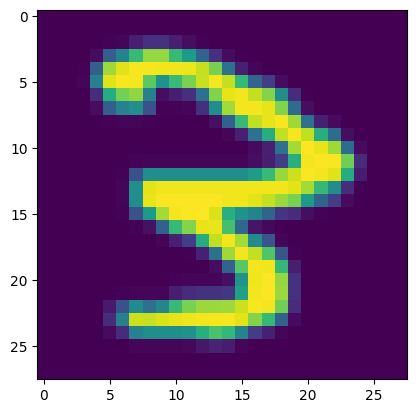

In [94]:
import matplotlib .pyplot as plt
plt.imshow(x_test[726])

In [95]:
x_test.shape

(18800, 28, 28, 1)

In [96]:
print(model.predict(x_test[726].reshape(1,-1)).argmax(axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[3]


In [97]:
model.save("emnist_ann_classifier.h5")


In [ ]:
# from google.colab import files
# files.download("emnist_ann_classifier.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>